# Alexander Toledo
## Analisis Exploratorio de Datos (EDA)
### Dataset: Customer Support on Twitter

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Guardamos la data en un df
df = pd.read_csv('twcs.csv')
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


## Contexto de las variables
### tweet_id
- A unique, anonymized ID for the Tweet. Referenced by response_tweet_id and in_response_to_tweet_id.
- Identificador único y anonimizado del tweet. Es referenciado por las variables response_tweet_id y in_response_to_tweet_id.
### author_id
- A unique, anonymized user ID. @s in the dataset have been replaced with their associated anonymized user ID.
- Identificador único y anonimizado del usuario. Las menciones (@) en el dataset fueron reemplazadas por su identificador de usuario anonimizado. 
### inbound
- Whether the tweet is "inbound" to a company doing customer support on Twitter. This feature is useful when re-organizing data for training conversational models.
- Indica si el tweet es una interacción “entrante” hacia una empresa que realiza atención al cliente en Twitter. Esta variable es útil para reorganizar los datos, por ejemplo, al entrenar modelos conversacionales. (True: de Usuario a Empresa, False: de Empresa a Usuario)
### created_at
- Date and time when the tweet was sent.
- Fecha y Hora de cuando el tweet fue enviado.
### text
- Tweet content. Sensitive information like phone numbers and email addresses are replaced with mask values like "__email __".
- Contenido del tweet.
Información sensible como números de teléfono o correos electrónicos fue reemplazada por valores enmascarados, como "__email __". 
### response_tweet_id
- IDs of tweets that are responses to this tweet, comma-separated.
- Identificadores de los tweets que son respuestas a este tweet, separados por comas.
### in_response_to_tweet_id
- ID of the tweet this tweet is in response to, if any.
- Identificador del tweet al cual este tweet responde, si corresponde.

#### Dimension del Dataset

In [4]:
df.shape

(2811774, 7)

- Tenemos una data de 2.811.744 filas y 7 columnas

#### Tipos de datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


##### Resumen
- tweet_id es del tipo entero, y al ser un ID idealmente debe ser unico.
- author_id es del tipo object (string), porque al ser un ID de usuario anonimizado es alfanumerico.
- inbound es del tipo boolean, por lo que, es una varible con dos opciones.
- created_at es del tipo object (string), pero es una fecha, por lo tanto esta variable debe ser corregida para poder analizar los tiempos de respuesta.
- text es del tipo object (string), correcto al ser un texto.
- response_tweet_id es del tipo object, al hacer referencia a 0, 1 o más IDs y al estar separados por coma, los ID's se identifican como strings.
- in_response_to_tweet_id es del tipo float, al hacer referencia al tweet_id que es un int, esta variables tambien debiese ser int, para poder hacer joins con tweet_id.

In [6]:
# Transformamos la variables created_at de object (string) a datetime.
df['created_at'] = pd.to_datetime(
    df['created_at'],
    format = "%a %b %d %H:%M:%S %z %Y"
)
df["created_at"].dtype

datetime64[ns, UTC]

In [7]:
# Transformamos la variables in_response_to_tweet_id de float a int
df['in_response_to_tweet_id'] = df['in_response_to_tweet_id'].astype('Int64')
df['in_response_to_tweet_id'].dtype

Int64Dtype()

In [25]:
# Revision del resultado
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,2017-10-31 22:10:47+00:00,@115712 I understand. I would like to assist y...,2,3
1,2,115712,True,2017-10-31 22:11:45+00:00,@sprintcare and how do you propose we do that,NaN,1
2,3,115712,True,2017-10-31 22:08:27+00:00,@sprintcare I have sent several private messag...,1,4
3,4,sprintcare,False,2017-10-31 21:54:49+00:00,@115712 Please send us a Private Message so th...,3,5
4,5,115712,True,2017-10-31 21:49:35+00:00,@sprintcare I did.,4,6


#### Duplicados

In [16]:
# Revision de duplicados
duplicados = df.duplicated().sum()
duplicados

np.int64(0)

##### Analisis duplicados
- No hay filas duplicadas, asi que no hay informacion repetida.

#### Nulos

In [15]:
# Revision de nulos
nulos = df.isna().sum()
nulos

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

##### Analisis nulos
- Lo nulos presentes se justifican debido a que no todos los tweets tienen respuestas asociadas y ademas no todos los tweets son respuestas a otros tweets, aquellos in_response_to_tweet_id que son nulos, son aquellos que inician un hilo, por lo tanto, existen 1.040.629, de tweets iniciales.
- Debido a esto, no se limpiaran estos valores y se trabajara con esos nulos como información relevante para el analisis.

#### Valores Únicos

In [9]:
df['tweet_id'].nunique()

2811774

In [10]:
df['author_id'].nunique()

702777

In [11]:
df['inbound'].unique()

array([False,  True])

In [13]:
df['response_tweet_id'].nunique()

1771145

In [14]:
df['in_response_to_tweet_id'].nunique()

1774822

In [22]:
df['text'].nunique()

2782618

In [24]:
diferencia = (df['tweet_id'].nunique()) - (df['text'].nunique())
diferencia

29156

##### Analisis valores unicos
- Hay 2.811.774 tweet_id unicos, por lo tanto, no deberia existir ningun tweet repetido.
- Hay 702.777 author_id unicos, considerando lo anterior, hay más tweets que autores.
- En inbound solo se puede tener False y True, lo que significa que el dato tipo bool esta correcto.
- En cuanto a los textos, hay 2.782.618 tweets con textos unicos, lo que nos deja con 29.156 textos repetidos, pero al no exisitr duplicados, entonces son mensajes repetidos por distintos usuarios o empresas.

#### Distribuciones básicas

In [20]:
# Conteo de tweets de empresa (false)
tweets_empresas = (df['inbound'] == False).sum()
print(f"La cantidad de tweets de empresas es : {tweets_empresas}")

La cantidad de tweets de empresas es : 1273931


In [21]:
tweets_usuarios = (df['inbound'] == True).sum()
print(f"La cantidad de tweets de empresas es : {tweets_usuarios}")

La cantidad de tweets de empresas es : 1537843


In [37]:
distribucion_tweets = df['response_tweet_id'].notna().value_counts()
tweets_respondidos = distribucion_tweets.get(True, 0)
tweets_no_respondidos = distribucion_tweets.get(False, 0)
dif_tweets = tweets_respondidos - tweets_no_respondidos
print(f'Hay {tweets_respondidos} tweets que cuentan con respuestas, mientras que hay {tweets_no_respondidos} de tweets sin respuestas. \n Lo que nos da una diferencia de {dif_tweets} tweets que cuentan con respuesta')

Hay 1771145 tweets que cuentan con respuestas, mientras que hay 1040629 de tweets sin respuestas. 
 Lo que nos da una diferencia de 730516 tweets que cuentan con respuesta


In [41]:
pd.options.display.float_format = '{:,.2f}'.format
df['longitud_text'] = df['text'].str.len() # Vemos la longitud de cada tweet
df['longitud_text'].describe() # Revisamos los resultados

count   2,811,774.00
mean          113.89
std            52.35
min             1.00
25%            78.00
50%           115.00
75%           139.00
max           513.00
Name: longitud_text, dtype: float64

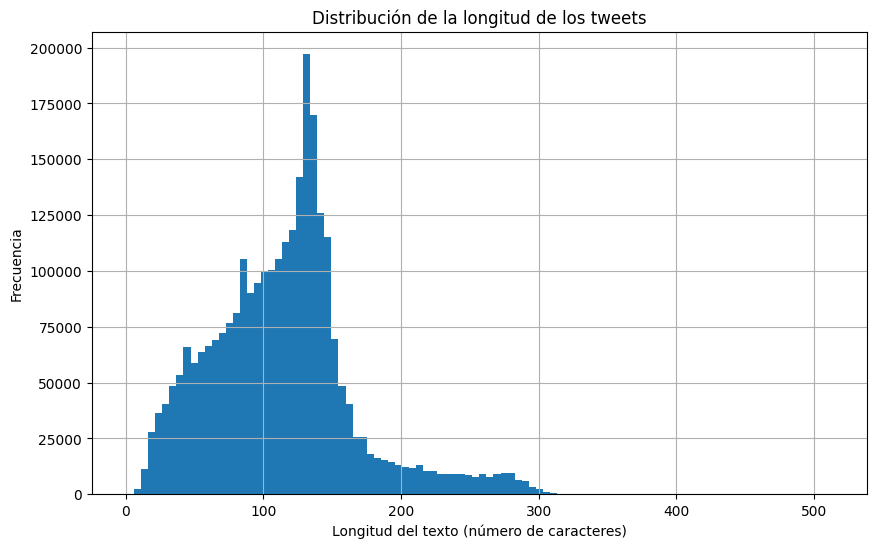

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))

text_hist = ax.hist(df['longitud_text'], bins=100)

ax.set_xlabel('Longitud del texto (número de caracteres)')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de la longitud de los tweets')
ax.grid(True)

plt.show()


##### Analisis distribuciones básicas
- Del total de tweets, tenemos 1.537.843 True, lo que significa que 1.537.843 tweets van dirigidos a una empresa.
- Mientras que tenemos 1.273.931 False, por lo tanto son 1.273.931 tweets que son respuestas de empresas.
- Hay 730.516 más tweets con respuestas que los tweets sin respuestas.
- En promedio los tweets son de 113 caracteres, con una desviacion de 52, existen tweets outliers de 1 y 513, sin embargo, el primer cuartil se encuentra en los 78 caracteres, el segundo cuartil esta en 115, muy cercano al promedio por lo que el promedio es representativo, y finalmente el tercer cuartil es de 139 caracteres.

## EDA Checklist
- Dimensión del dataset __R__
- Tipos de datos __R__
- Valores nulos y duplicados __R__
- Distribuciones básicas __R__
- Valores únicos __R__
- Outliers
- Calidad del texto
- Consistencia lógica
- Cobertura temporal